<a href="https://colab.research.google.com/github/DiazJaja/Progralll-2024-Semi/blob/Progralll-Computolll/IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importar la libreria de tensorflow para sumar dos numeros.
import tensorflow as tf

In [ ]:
num1 = int(input("Num 1: "))
num2 = int(input("Num 2: "))

a = tf.Variable(num1)
b = tf.Variable(num2)

print(a)

respuesta = tf.add(a,b)

print("La suma es: ", respuesta.numpy())

Num 1: 2
Num 2: 2
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>
La suma es:  4


In [ ]:
#importar la libreria de pandas.
import pandas as pd

In [ ]:
#leer el archivo de notas
ruta = "/content/.csv"
notas = pd.read_csv(ruta, sep=";", encoding="utf-8")

print(notas["nota"])

In [ ]:
#Obtener el listado de alumno aprobados
aprobados = notas[notas["nota"]>=6]
print(aprobados)

In [ ]:
#Obtener el listado de reprobados.
reprobados = notas[notas["nota"]<6]
print(reprobados)

In [ ]:
#Cuantos (numero) aprobaron la materia.
print("Numero de Aprobados", len(aprobados))
cantidad_aprobados = notas.loc[notas["nota"]>=6].agg({"count"})

print("Cantdad de aprobados", cantidad_aprobados)

In [ ]:
#Cuantos (Numero) reprobaron la materia
cantidad_reprobados = reprobados.agg({"count"})
print("Cantdad de reprobados: ", cantidad_reprobados)

In [ ]:
#agrupar por notas.
grupo = notas.groupby(["nota"]).agg({
  'nombre': lambda x: ', '.join(map(str, x))
})
print(grupo)

Entrenando una IA de coversores de temperatura

In [33]:
import tensorflow as tf
import pandas as pd

temp = pd.read_csv("/content/EllenIA.csv", sep=";")
print(temp)

      c      f       k
0   -50  -58.0  223.15
1   -40  -40.0  233.15
2   -30  -22.0  243.15
3   -20   -4.0  253.15
4   -15    5.0  258.15
5   -10   14.0  263.15
6    -5   23.0  268.15
7    -4   24.8  269.15
8    -3   26.6  270.15
9    -2   28.4  271.15
10   -1   30.2  272.15
11    0   32.0  273.15
12    1   33.8  274.15
13    2   35.6  275.15
14    3   37.4  276.15
15    4   39.2  277.15
16    5   41.0  278.15
17   10   50.0  283.15
18   15   59.0  288.15
19   20   68.0  293.15
20   30   86.0  303.15
21   40  104.0  313.15
22   50  122.0  323.15
23   15   59.0  288.15
24   20   68.0  293.15
25   25   77.0  298.15
26   30   86.0  303.15
27   35   95.0  308.15
28   40  104.0  313.15
29   45  113.0  318.15
30   50  122.0  323.15
31   55  131.0  328.15
32   60  140.0  333.15
33   65  149.0  338.15
34   70  158.0  343.15
35   75  167.0  348.15
36   80  176.0  353.15
37   85  185.0  358.15
38   90  194.0  363.15
39   95  203.0  368.15
40  100  212.0  373.15


In [34]:
#datos de entrenamiento
celsius = temp["c"]
fahrenheit = temp["f"]

#print(fahrenheit)

In [35]:
#modelo.
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
#compilar nuestro modelo.
modelo.compile(optimizer=tf.keras.optimizers.Adam(1.0), loss="mean_squared_error")

#entrenamiento
epocas = modelo.fit(celsius, fahrenheit, epochs=200, verbose=0)

In [ ]:
#copilar nuestro modelo.
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(1.0),
    loss='mean_squared_error'
)

#entrenamiento.
epocas = modelo.fit(celsius, fahrenheit, epochs=200, verbose=1)

In [38]:
#probar nuestra IA
g = int(input("Celsius: "))
grados = np.array([g])
resp = modelo.predict(grados)
print("El valor en Farenheits es: ", round(resp[0][0],2) )

Celsius: 24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
El valor en Farenheits es:  75.2


Actividad en clase: Fahrenheit a kelvin

In [ ]:
import tensorflow as tf
import pandas as pd

temp = pd.read_csv("/content/EllenIA.csv", sep=";")
print(temp)

In [63]:
#datos de entrenamiento
Fahrenheit = temp["f"]
Kelvin = temp["k"]

#print(Kelvin)

In [64]:
#modelo.
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
#compilar nuestro modelo.
modelo.compile(optimizer=tf.keras.optimizers.Adam(1.0), loss="mean_squared_error")

#entrenamiento
epocas = modelo.fit(Fahrenheit, Kelvin, epochs=200, verbose=0)

In [ ]:
#copilar nuestro modelo.
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(1.0),
    loss='mean_squared_error'
)

#entrenamiento.
epocas = modelo.fit(Fahrenheit, Kelvin, epochs=200, verbose=1)

In [67]:
#probar nuestra IA
g = int(input("Fahrenheit: "))
grados = np.array([g])
resp = modelo.predict(grados)
print("El valor en Kelvin es: ", round(resp[0][0],4) )

Fahrenheit: 24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
El valor en Kelvin es:  268.7055


Tarea: Fahrenheit a Celsius

In [ ]:
import tensorflow as tf
import pandas as pd

temp = pd.read_csv("/content/EllenIA.csv", sep=";")
print(temp)

In [69]:
#datos de entrenamiento
Fahrenheit = temp["f"]
Celsius = temp["c"]

#print(Celsius)

In [70]:
#modelo.
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
#compilar nuestro modelo.
modelo.compile(optimizer=tf.keras.optimizers.Adam(1.0), loss="mean_squared_error")

#entrenamiento
epocas = modelo.fit(Fahrenheit, Celsius, epochs=200, verbose=0)

In [73]:
#probar nuestra IA
g = int(input("Celsius: "))
grados = np.array([g])
resp = modelo.predict(grados)
print("El valor en celsius es: ", round(resp[0][0],4) )

Celsius: 24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
El valor en celsius es:  -4.4444


Personal con menu

In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
from IPython.display import Image, display

In [16]:
# Cargar datos desde el archivo CSV
temp = pd.read_csv("/content/EllenIA.csv", sep=";")
print(temp)

# Extraer las columnas necesarias
Fahrenheit = temp["f"]
Kelvin = temp["k"]
Celsius = temp["c"]

# Mostrar el DataFrame con las columnas necesarias
print("\nDatos de entrenamiento:")
print(temp)

      c      f       k
0   -50  -58.0  223.15
1   -40  -40.0  233.15
2   -30  -22.0  243.15
3   -20   -4.0  253.15
4   -15    5.0  258.15
5   -10   14.0  263.15
6    -5   23.0  268.15
7    -4   24.8  269.15
8    -3   26.6  270.15
9    -2   28.4  271.15
10   -1   30.2  272.15
11    0   32.0  273.15
12    1   33.8  274.15
13    2   35.6  275.15
14    3   37.4  276.15
15    4   39.2  277.15
16    5   41.0  278.15
17   10   50.0  283.15
18   15   59.0  288.15
19   20   68.0  293.15
20   30   86.0  303.15
21   40  104.0  313.15
22   50  122.0  323.15
23   15   59.0  288.15
24   20   68.0  293.15
25   25   77.0  298.15
26   30   86.0  303.15
27   35   95.0  308.15
28   40  104.0  313.15
29   45  113.0  318.15
30   50  122.0  323.15
31   55  131.0  328.15
32   60  140.0  333.15
33   65  149.0  338.15
34   70  158.0  343.15
35   75  167.0  348.15
36   80  176.0  353.15
37   85  185.0  358.15
38   90  194.0  363.15
39   95  203.0  368.15
40  100  212.0  373.15

Datos de entrenamiento:
      c  

In [17]:
# Crear el modelo de red neuronal
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

# Compilar el modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1.0), loss="mean_squared_error")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Entrenar el modelo con los datos de Fahrenheit y Kelvin
epocas = modelo.fit(Fahrenheit, Kelvin, epochs=200, verbose=1)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 285.3400 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 257.4974 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 283.8933 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 275.8094 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 244.3434 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 247.7630 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 219.0282 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 245.1545 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 218.9749 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 193.6086 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 198.6152
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 188.0503  
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 204.6716
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 182.4694 
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - lo

In [19]:
# Función para convertir Fahrenheit a Kelvin (con la fórmula exacta)
def fahrenheit_a_kelvin(f):
    return np.floor(((f - 32) * (5/9) + 273.15) * 10000) / 10000

# Función para convertir Celsius a Kelvin
def celsius_a_kelvin(c):
    return round(c + 273.15, 4)

# Función para convertir Kelvin a Celsius
def kelvin_a_celsius(k):
    return round(k - 273.15, 4)

# Función para convertir Fahrenheit a Celsius
def fahrenheit_a_celsius(f):
    return round((f - 32) * 5 / 9, 4)

In [20]:
# Función para mostrar el menú y manejar las conversiones
def menu_conversion():
    while True:
        print("\nElija la conversión que desea realizar:")
        print("1. Fahrenheit a Kelvin")
        print("2. Celsius a Kelvin")
        print("3. Kelvin a Celsius")
        print("4. Fahrenheit a Celsius")

        opcion = int(input("Opción: "))

        if opcion == 1:
            f = float(input("Ingrese la temperatura en Fahrenheit: "))
            resultado = fahrenheit_a_kelvin(f)
            print(f"{f} grados Fahrenheit son {resultado} Kelvin")

        elif opcion == 2:
            c = float(input("Ingrese la temperatura en Celsius: "))
            resultado = celsius_a_kelvin(c)
            print(f"{c} grados Celsius son {resultado} Kelvin")

        elif opcion == 3:
            k = float(input("Ingrese la temperatura en Kelvin: "))
            resultado = kelvin_a_celsius(k)
            print(f"{k} Kelvin son {resultado} grados Celsius")

        elif opcion == 4:
            f = float(input("Ingrese la temperatura en Fahrenheit: "))
            resultado = fahrenheit_a_celsius(f)
            print(f"{f} grados Fahrenheit son {resultado} grados Celsius")

        else:
            print("Opción no válida. Intente de nuevo.")
            continue

        otra_conversion = input("\n¿Desea hacer otra conversión? (s/n): ").lower()

        if otra_conversion != 's':
            print("¡Gracias por usar el conversor! Hasta luego.")

            # Mostrar la imagen solo cuando el usuario termina
            display(Image(filename='/content/ellen.jpg'))  # Cambia la ruta si es necesario
            break


Elija la conversión que desea realizar:
1. Fahrenheit a Kelvin
2. Celsius a Kelvin
3. Kelvin a Celsius
4. Fahrenheit a Celsius
Opción: 2
Ingrese la temperatura en Celsius: 12
12.0 grados Celsius son 285.15 Kelvin

¿Desea hacer otra conversión? (s/n): n
¡Gracias por usar el conversor! Hasta luego.


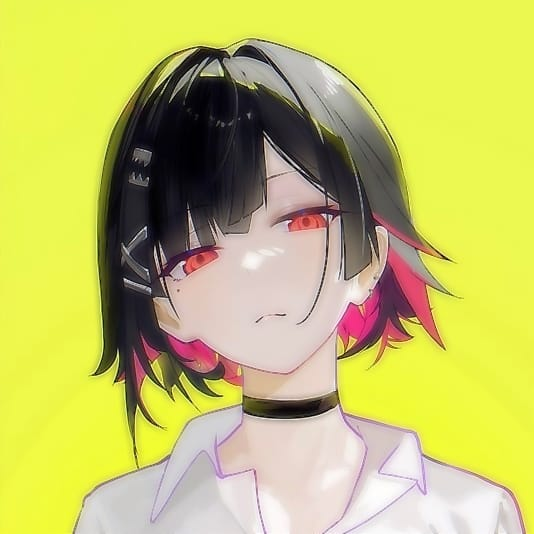

In [22]:
# Llamar al menú
menu_conversion()